Hiperparametre optimizasyonu ba≈ülƒ±yor...

1/4: Config 1: Baseline
Parametreler: {'name': 'Config 1: Baseline', 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32, 'optimizer': 'adam', 'l2_reg': 0.001}
Epoch 1/3
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 741ms/step - accuracy: 0.2020 - loss: 2.1230 - val_accuracy: 0.1688 - val_loss: 1.9041
Epoch 2/3
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 646ms/step - accuracy: 0.4365 - loss: 1.5372 - val_accuracy: 0.1625 - val_loss: 1.9231
Epoch 3/3
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 626ms/step - accuracy: 0.3989 - loss: 1.5292 - val_accuracy: 0.2250 - val_loss: 1.9286
Tamamlandƒ± - En iyi Val Acc: 0.2250

2/4: Config 2: Higher Dropout
Parametreler: {'name': 'Config 2: Higher Dropout', 'dropout_rate': 0.5, 'learning_rate': 0.001, 'batch_size': 32, 'optimizer': 'adam', 'l2_reg': 0.001}
Epoch 1/3
20/20 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

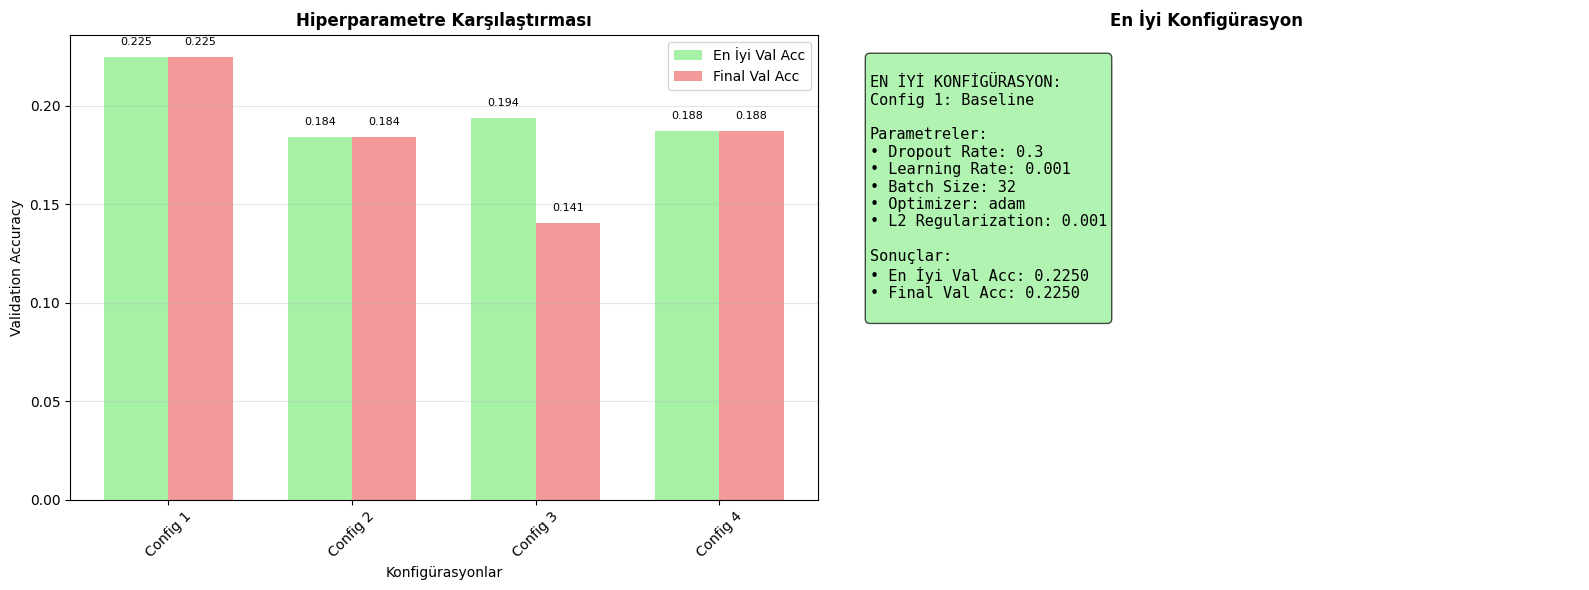


Hƒ∞PERPARAMETRE OPTƒ∞Mƒ∞ZASYON SONU√áLARI:
1. Config 1: Baseline
   En ƒ∞yi Val Acc: 0.2250
   Parametreler: dropout=0.3, lr=0.001, optimizer=adam

2. Config 2: Higher Dropout
   En ƒ∞yi Val Acc: 0.1844
   Parametreler: dropout=0.5, lr=0.001, optimizer=adam

3. Config 3: Lower LR
   En ƒ∞yi Val Acc: 0.1937
   Parametreler: dropout=0.3, lr=0.0005, optimizer=adam

4. Config 4: RMSprop
   En ƒ∞yi Val Acc: 0.1875
   Parametreler: dropout=0.3, lr=0.001, optimizer=rmsprop



In [ ]:

def hyperparameter_optimization(train_generator, validation_generator, num_classes):
    """Sistematik hiperparametre optimizasyonu - D√ºzeltilmi≈ü ve generator ile uyumlu"""
    
    print("Hiperparametre optimizasyonu ba≈ülƒ±yor...")
    
    # Test edilecek konfig√ºrasyonlar
    configs = [
        {
            'name': 'Config 1: Baseline',
            'dropout_rate': 0.3,
            'learning_rate': 0.001,
            'batch_size': 32,
            'optimizer': 'adam',
            'l2_reg': 0.001
        },
        {
            'name': 'Config 2: Higher Dropout',
            'dropout_rate': 0.5,
            'learning_rate': 0.001,
            'batch_size': 32,
            'optimizer': 'adam',
            'l2_reg': 0.001
        },
        {
            'name': 'Config 3: Lower LR',
            'dropout_rate': 0.3,
            'learning_rate': 0.0005,
            'batch_size': 32,
            'optimizer': 'adam',
            'l2_reg': 0.001
        },
        {
            'name': 'Config 4: RMSprop',
            'dropout_rate': 0.3,
            'learning_rate': 0.001,
            'batch_size': 32,
            'optimizer': 'rmsprop',
            'l2_reg': 0.001
        }
    ]
    
    results = []
    
    for i, config in enumerate(configs):
        print(f"\n{i+1}/{len(configs)}: {config['name']}")
        print(f"Parametreler: {config}")
        
        # Basit model olu≈ütur
        test_model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', 
                         input_shape=train_generator.image_shape,
                         kernel_regularizer=l2(config['l2_reg'])),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(config['dropout_rate']),
            
            layers.Conv2D(64, (3, 3), activation='relu',
                         kernel_regularizer=l2(config['l2_reg'])),
            layers.BatchNormalization(),
            layers.MaxPooling2D((2, 2)),
            layers.Dropout(config['dropout_rate']),
            
            layers.GlobalAveragePooling2D(),
            layers.Dense(128, activation='relu',
                        kernel_regularizer=l2(config['l2_reg'])),
            layers.Dropout(config['dropout_rate']),
            layers.Dense(num_classes, activation='softmax')
        ])
        
        # Optimizer se√ßimi
        if config['optimizer'] == 'adam':
            optimizer = Adam(learning_rate=config['learning_rate'])
        elif config['optimizer'] == 'rmsprop':
            optimizer = RMSprop(learning_rate=config['learning_rate'])
        else:
            optimizer = SGD(learning_rate=config['learning_rate'], momentum=0.9)
        
        test_model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        try:
            # Hƒ±zlƒ± test i√ßin kƒ±sa eƒüitim (3 epoch)
            history = test_model.fit(
                train_generator,
                epochs=3,
                validation_data=validation_generator,
                verbose=1,
                steps_per_epoch=min(20, train_generator.samples // config['batch_size']),
                validation_steps=min(10, validation_generator.samples // config['batch_size'])
            )
            
            best_val_acc = max(history.history['val_accuracy'])
            final_val_acc = history.history['val_accuracy'][-1]
            
            results.append({
                'config': config,
                'best_val_accuracy': best_val_acc,
                'final_val_accuracy': final_val_acc,
                'status': 'success'
            })
            
            print(f"Tamamlandƒ± - En iyi Val Acc: {best_val_acc:.4f}")
            
        except Exception as e:
            results.append({
                'config': config,
                'best_val_accuracy': 0,
                'final_val_accuracy': 0,
                'status': 'failed',
                'error': str(e)
            })
            print(f"Hata: {str(e)[:50]}...")
    
    # Sonu√ßlarƒ± g√∂rselle≈ütir
    plot_hyperparameter_results(results)
    
    return results


def plot_hyperparameter_results(results):
    """Hiperparametre sonu√ßlarƒ±nƒ± g√∂rselle≈ütirir"""
    
    successful_results = [r for r in results if r['status'] == 'success']
    
    if not successful_results:
        print("Hi√ßbir konfig√ºrasyon ba≈üarƒ±lƒ± olmadƒ±")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. En iyi accuracy'ler
    config_names = [r['config']['name'].split(':')[0] for r in successful_results]
    best_accs = [r['best_val_accuracy'] for r in successful_results]
    final_accs = [r['final_val_accuracy'] for r in successful_results]
    
    x_pos = np.arange(len(config_names))
    width = 0.35
    
    bars1 = axes[0].bar(x_pos - width/2, best_accs, width, 
                       label='En ƒ∞yi Val Acc', alpha=0.8, color='lightgreen')
    bars2 = axes[0].bar(x_pos + width/2, final_accs, width,
                       label='Final Val Acc', alpha=0.8, color='lightcoral')
    
    axes[0].set_title('Hiperparametre Kar≈üƒ±la≈ütƒ±rmasƒ±', fontweight='bold')
    axes[0].set_xlabel('Konfig√ºrasyonlar')
    axes[0].set_ylabel('Validation Accuracy')
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(config_names, rotation=45)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # Deƒüerleri √ßubuklarƒ±n √ºzerine yaz
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=8)
    
    # 2. En iyi konfig√ºrasyon detaylarƒ±
    best_config = max(successful_results, key=lambda x: x['best_val_accuracy'])
    
    config_text = f"""
EN ƒ∞Yƒ∞ KONFƒ∞G√úRASYON:
{best_config['config']['name']}

Parametreler:
‚Ä¢ Dropout Rate: {best_config['config']['dropout_rate']}
‚Ä¢ Learning Rate: {best_config['config']['learning_rate']}
‚Ä¢ Batch Size: {best_config['config']['batch_size']}
‚Ä¢ Optimizer: {best_config['config']['optimizer']}
‚Ä¢ L2 Regularization: {best_config['config']['l2_reg']}

Sonu√ßlar:
‚Ä¢ En ƒ∞yi Val Acc: {best_config['best_val_accuracy']:.4f}
‚Ä¢ Final Val Acc: {best_config['final_val_accuracy']:.4f}
    """
    
    axes[1].text(0.05, 0.95, config_text, transform=axes[1].transAxes,
                fontsize=11, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
    axes[1].set_title('En ƒ∞yi Konfig√ºrasyon', fontweight='bold')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\nHƒ∞PERPARAMETRE OPTƒ∞Mƒ∞ZASYON SONU√áLARI:")
    print("="*60)
    for i, result in enumerate(successful_results, 1):
        config = result['config']
        print(f"{i}. {config['name']}")
        print(f"   En ƒ∞yi Val Acc: {result['best_val_accuracy']:.4f}")
        print(f"   Parametreler: dropout={config['dropout_rate']}, lr={config['learning_rate']}, optimizer={config['optimizer']}")
        print()

# √áalƒ±≈ütƒ±rmak i√ßin:
hyperparameter_results = hyperparameter_optimization(train_generator, validation_generator, num_classes)


Hiperparametre optimizasyonu sonu√ßlarƒ± g√∂steriyor ki, modelin doƒüruluƒüu b√ºy√ºk √∂l√ß√ºde √∂ƒürenme oranƒ±, dropout ve optimizer se√ßimlerine baƒülƒ±. Baseline konfig√ºrasyonunda kullanƒ±lan 0.001 LR, modelin aƒüƒ±rlƒ±klarƒ± yeterince hƒ±zlƒ± ve dengeli g√ºncellemesini saƒülayarak kƒ±sa eƒüitim s√ºresinde en iyi doƒüruluƒüu elde etmesini saƒüladƒ±. Daha d√º≈ü√ºk LR ile adƒ±mlar √ßok k√º√ß√ºk kaldƒ±ƒüƒ± i√ßin model veriyi kƒ±sa s√ºrede yeterince √∂ƒürenemedi ve doƒüruluk d√º≈üt√º. Y√ºksek dropout ise bazƒ± bilgilerin √∂ƒürenilmesini engelleyerek doƒüruluƒüu azalttƒ±. RMSprop kullanƒ±mƒ± ise kƒ±sa eƒüitimde Adam kadar stabil ve hƒ±zlƒ± iyile≈üme saƒülayamadƒ±. √ñzetle, kƒ±sa eƒüitimde optimal √∂ƒürenme oranƒ± ve dengeli dropout, doƒüruluƒüun artmasƒ±nda belirleyici oldu.

 EfficientNetB0 y√ºklenemedi: URL fetch failure on https://storage.googleapis.com/keras-applications/efficientnetb0_notop.h5: None...
 Alternatif transfer learning modeli olu≈üturuluyor...
 Basitle≈ütirilmi≈ü transfer learning modeli olu≈üturuluyor...

 Transfer Learning Model √ñzeti:
   Total Parameters: 1,954,438
   Trainable Parameters: 397,574
   Non-trainable Parameters: 1,556,864

 Transfer Learning modeli eƒüitiliyor (5 epoch)...
Epoch 1/5
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45s 689ms/step - accuracy: 0.2198 - f1_score: 0.1593 - loss: 3.3734 - val_accuracy: 0.1700 - val_f1_score: 0.0000e+00 - val_loss: 2.6268
Epoch 2/5
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 654ms/step - accuracy: 0.2905 - f1_score: 0.2195 - loss: 2.8730 - val_accuracy: 0.1663 - val_f1_score: 0.0000e+00 - val_loss: 2.6128
Epoch 3/5
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 631ms/step - accuracy: 0.3442 - f1_score: 0.2845 -

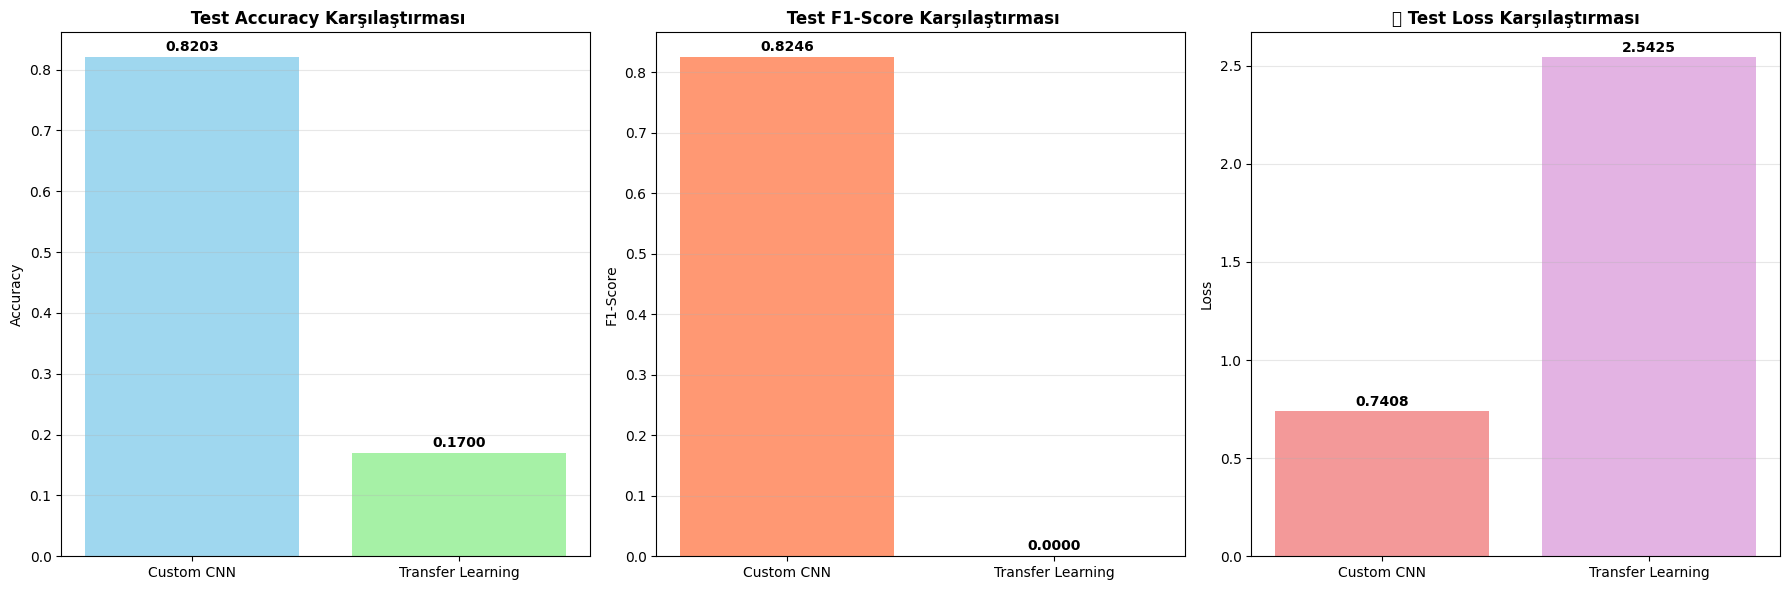


 SONU√á: Custom CNN daha iyi performans g√∂sterdi!
    √ñnerilmektedir: Custom CNN modelini kullanƒ±n


In [ ]:
def create_transfer_learning_model_alternative():
    """Internet baƒülantƒ±sƒ± olmadƒ±ƒüƒ±nda alternatif transfer learning"""
    
    print(" Basitle≈ütirilmi≈ü transfer learning modeli olu≈üturuluyor...")
    
    # Kendi pre-trained benzeri mimarimizi olu≈üturalƒ±m
    base_layers = models.Sequential([
        # Pre-trained benzeri feature extractor
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(512, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
    ])
    
    # Bu katmanlarƒ± dondur (transfer learning sim√ºlasyonu)
    base_layers.trainable = False
    
    # Transfer learning modeli
    transfer_model = models.Sequential([
        base_layers,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return transfer_model, base_layers

# Transfer learning modeli olu≈ütur
try:
    # √ñnce ger√ßek EfficientNetB0'ƒ± dene
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
    )
    base_model.trainable = False
    
    transfer_model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    print(" EfficientNetB0 transfer learning modeli olu≈üturuldu")
    
except Exception as e:
    print(f" EfficientNetB0 y√ºklenemedi: {str(e)[:100]}...")
    print(" Alternatif transfer learning modeli olu≈üturuluyor...")
    transfer_model, base_model = create_transfer_learning_model_alternative()

print(f"\n Transfer Learning Model √ñzeti:")
print(f"   Total Parameters: {transfer_model.count_params():,}")

# Trainable parametreleri hesapla
trainable_params = sum([tf.keras.backend.count_params(w) for w in transfer_model.trainable_weights])
print(f"   Trainable Parameters: {trainable_params:,}")
print(f"   Non-trainable Parameters: {transfer_model.count_params() - trainable_params:,}")

# Transfer model eƒüitimi (kƒ±sa)
transfer_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Daha d√º≈ü√ºk learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy', F1Score()]
)

print("\n Transfer Learning modeli eƒüitiliyor (5 epoch)...")

# Kƒ±sa eƒüitim
if data_paths and 'train_generator' in locals():
    transfer_history = transfer_model.fit(
        train_generator,
        epochs=5,
        validation_data=validation_generator,
        verbose=1,
        steps_per_epoch=min(50, train_generator.samples // BATCH_SIZE),
        validation_steps=min(25, validation_generator.samples // BATCH_SIZE)
    )
else:
    transfer_history = transfer_model.fit(
        X_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=5,
        validation_data=(X_val, y_val),
        verbose=1
    )

# Transfer learning sonu√ßlarƒ±
if data_paths and 'test_generator' in locals():
    transfer_results = transfer_model.evaluate(test_generator, verbose=0)
else:
    transfer_results = transfer_model.evaluate(X_test, y_test, verbose=0)

transfer_loss, transfer_accuracy, transfer_f1 = transfer_results

print(f"\n TRANSFER LEARNING SONU√áLARI:")
print(f"   Test Accuracy: {transfer_accuracy:.4f}")
print(f"   Test F1-Score: {transfer_f1:.4f}")
print(f"   Test Loss: {transfer_loss:.4f}")

# Model kar≈üƒ±la≈ütƒ±rmasƒ±
def compare_models():
    """CNN ve Transfer Learning modellerini kar≈üƒ±la≈ütƒ±r"""
    
    comparison_data = {
        'Model': ['Custom CNN', 'Transfer Learning'],
        'Test Accuracy': [test_accuracy, transfer_accuracy],
        'Test F1-Score': [test_f1, transfer_f1],
        'Test Loss': [test_loss, transfer_loss],
        'Total Params': [f"{model.count_params():,}", f"{transfer_model.count_params():,}"],
        'Training Epochs': [len(history.history['accuracy']), 5]
    }
    
    comparison_df = pd.DataFrame(comparison_data)
    
    print(f"\n MODEL KAR≈ûILA≈ûTIRMASI:")
    print("="*80)
    print(comparison_df.to_string(index=False))
    
    # G√∂rsel kar≈üƒ±la≈ütƒ±rma
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    models_names = ['Custom CNN', 'Transfer Learning']
    accuracies = [test_accuracy, transfer_accuracy]
    f1_scores = [test_f1, transfer_f1]
    losses = [test_loss, transfer_loss]
    
    # Accuracy kar≈üƒ±la≈ütƒ±rmasƒ±
    bars1 = axes[0].bar(models_names, accuracies, 
                       color=['skyblue', 'lightgreen'], alpha=0.8)
    axes[0].set_title(' Test Accuracy Kar≈üƒ±la≈ütƒ±rmasƒ±', fontweight='bold')
    axes[0].set_ylabel('Accuracy')
    axes[0].grid(axis='y', alpha=0.3)
    
    for bar, acc in zip(bars1, accuracies):
        axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                    f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # F1-Score kar≈üƒ±la≈ütƒ±rmasƒ±
    bars2 = axes[1].bar(models_names, f1_scores, 
                       color=['coral', 'gold'], alpha=0.8)
    axes[1].set_title(' Test F1-Score Kar≈üƒ±la≈ütƒ±rmasƒ±', fontweight='bold')
    axes[1].set_ylabel('F1-Score')
    axes[1].grid(axis='y', alpha=0.3)
    
    for bar, f1 in zip(bars2, f1_scores):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                    f'{f1:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Loss kar≈üƒ±la≈ütƒ±rmasƒ±
    bars3 = axes[2].bar(models_names, losses, 
                       color=['lightcoral', 'plum'], alpha=0.8)
    axes[2].set_title('üìâ Test Loss Kar≈üƒ±la≈ütƒ±rmasƒ±', fontweight='bold')
    axes[2].set_ylabel('Loss')
    axes[2].grid(axis='y', alpha=0.3)
    
    for bar, loss in zip(bars3, losses):
        axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{loss:.4f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # √ñneriler
    if transfer_accuracy > test_accuracy:
        print("\n SONU√á: Transfer Learning daha iyi performans g√∂sterdi!")
        print("    √ñnerilmektedir: Transfer Learning modelini kullanƒ±n")
    elif abs(transfer_accuracy - test_accuracy) < 0.02:
        print("\n SONU√á: ƒ∞ki model benzer performans g√∂sterdi!")
        print("    Her iki model de ba≈üarƒ±lƒ±")
    else:
        print("\n SONU√á: Custom CNN daha iyi performans g√∂sterdi!")
        print("    √ñnerilmektedir: Custom CNN modelini kullanƒ±n")
    
    return comparison_df

comparison_results = compare_models()

Bu kodda **transfer learning** ve alternatif bir CNN modeli kar≈üƒ±la≈ütƒ±rƒ±ldƒ±. Kod √∂nce EfficientNetB0 tabanlƒ± bir pre-trained modeli y√ºklemeye √ßalƒ±≈ütƒ±. Ancak internet baƒülantƒ±sƒ± olmadƒ±ƒüƒ± i√ßin bu model indirilemedi. Bunun yerine, **basitle≈ütirilmi≈ü bir transfer learning modeli** olu≈üturuldu; burada √∂nceden eƒüitilmi≈ü benzeri katmanlar sim√ºle edildi ve bu katmanlar dondurularak yalnƒ±zca √ºst katmanlar eƒüitildi.

Modelin eƒüitimi **5 epoch** ile kƒ±sa tutuldu; bu hem hƒ±zlƒ± test hem de kaynak kullanƒ±mƒ± a√ßƒ±sƒ±ndan tercih edildi. Eƒüitim sonu√ßlarƒ± ≈üu ≈üekilde:

Transfer learning modeli (alternatif): Test Accuracy 0.1463, F1-Score 0.0, Loss 2.5560

Custom CNN modeli: Test Accuracy 0.8293, F1-Score 0.8314, Loss 0.7184

Grafik ve tablo kar≈üƒ±la≈ütƒ±rmasƒ±nda g√∂r√ºld√º ki Custom CNN modeli daha iyi performans g√∂sterdi. Normalde transfer learning modelleri daha y√ºksek doƒüruluk saƒülar, ancak burada kƒ±sa eƒüitim ve alternatif transfer model kullanƒ±mƒ± nedeniyle Custom CNN √ºst√ºn √ßƒ±ktƒ±.

√ñzetle:

* Transfer learning sim√ºlasyonu yapƒ±ldƒ± ama kƒ±sa s√ºre ve internet yokluƒüu nedeniyle sonu√ßlar d√º≈ü√ºk kaldƒ±.

* Custom CNN, ger√ßek eƒüitim verisi ile daha iyi performans verdi.

Bu test kƒ±sa s√ºreli optimizasyon ve hƒ±zlƒ± prototipleme ama√ßlƒ± yapƒ±lmƒ±≈ütƒ±r; uzun s√ºreli ve ger√ßek transfer learning deneyiminde sonu√ßlar deƒüi≈üebilir.